In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
np.random.seed(0)
n_samples=100
mean=[0,0]
cov = [[1.0,0.8],[0.8,1.0]]
data = np.random.multivariate_normal(mean, cov, size=n_samples).T

x=data[0]
y=data[1]

In [7]:
with pm.Model() as model:
    rho=pm.Uniform('rho', -1, 1)
    sigma_x=pm.HalfNormal('sigma_x', sd=1)
    sigma_y=pm.HalfNormal('sigma_y', sd=1)
    cov_matrix=pm.math.stack(([sigma_x**2, rho * sigma_x * sigma_y],[rho * sigma_x * sigma_y,sigma_y**2]))
    bivariate_normal=pm.MvNormal('bivariate_normal', mu=[0,0], cov=cov_matrix, observed=data.T)
    

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma_y, sigma_x, rho]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


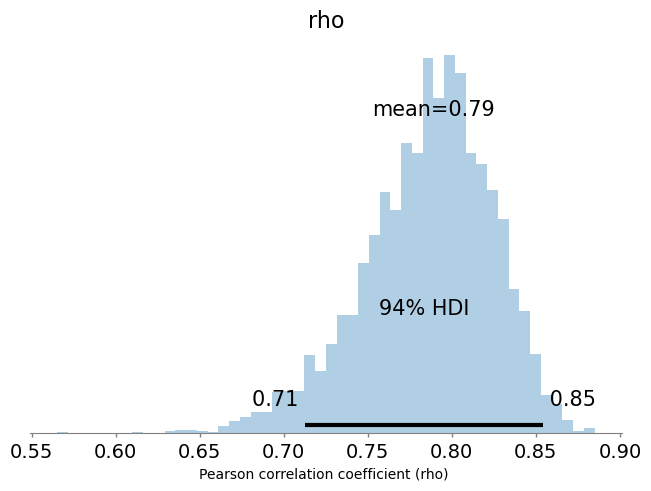

In [10]:
with model:
    trace=pm.sample(2000,tune=2000,cores=1)
    
pm.plot_posterior(trace, var_names=['rho'], kind='hist', bins=50)
plt.xlabel('Pearson correlation coefficient (rho) ')
plt.show()
    

In [14]:
# ----------- >> >> >>  With Dataset

In [2]:
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [22]:
#n_samples=500

#data=pd.read_csv("C:/Users/Talha/Downloads/Dataset.csv")
#x=data['Height'].values
#y=data['Weight'].values

data=pd.read_csv("C:/Users/Talha/Downloads/tvmarketing.csv")
x=data['TV'].values
y=data['Sales'].values

mean_h = np.mean(x)
mean_w = np.mean(y)
print(mean_h)
print(mean_w)

147.0425
14.0225


In [24]:
with pm.Model() as model:
    rho=pm.Uniform('rho', -1, 1)
    sigma_x=pm.HalfNormal('sigma_x', sd=1)
    sigma_y=pm.HalfNormal('sigma_y', sd=1)
    covm=pm.math.stack(([sigma_x**2, rho * sigma_x * sigma_y],[rho * sigma_x * sigma_y,sigma_y**2]))
    bivariate_normal=pm.MvNormal('bivariate_normal', mu=[np.mean(x), np.mean(y)], cov=covm, observed=np.vstack((x,y)).T)
    

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma_y, sigma_x, rho]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 84 seconds.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


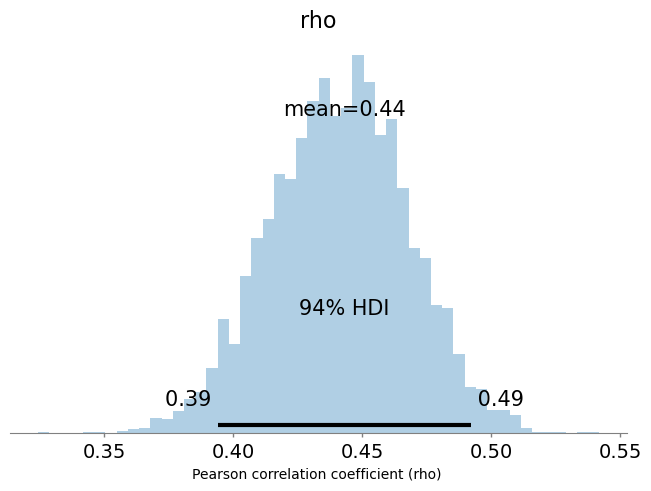

In [25]:
with model:
    trace=pm.sample(2000,tune=2000,cores=1)
    
pm.plot_posterior(trace, var_names=['rho'], kind='hist', bins=50)
plt.xlabel('Pearson correlation coefficient (rho) ')
plt.show()